In [66]:
import datetime as dt 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
plt.style.use('ggplot') 
%config InlineBackend.figure_format = 'retina'

In [71]:
accidents = pd.read_csv('Accidents0515.csv',index_col='Accident_Index')
casualties = pd.read_csv('Casualties0515.csv',index_col='Accident_Index',on_bad_lines='skip')
vehicles = pd.read_csv('Vehicles0515.csv', index_col='Accident_Index', on_bad_lines='skip')

In [72]:
accidents.shape

(1780653, 31)

In [73]:
casualties.shape

(2216720, 14)

In [74]:
vehicles.shape

(3004425, 21)

In [75]:
accidents.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR','LSOA_of_Accident_Location',
                'Junction_Control' ,'2nd_Road_Class'], axis=1, inplace=True) 

In [76]:
accidents  = accidents.join(vehicles, how = 'outer') 
accidents

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,-0.2,51.5,1,2,1,1,04/01/2005,3,17:42,12,...,1.0,15.0,2.0,74.0,10.0,-1.0,-1.0,-1.0,7.0,1.0
200501BS00002,-0.2,51.5,1,3,1,1,05/01/2005,4,17:36,12,...,1.0,1.0,1.0,42.0,7.0,8268.0,2.0,3.0,-1.0,-1.0
200501BS00003,-0.2,51.5,1,3,2,1,06/01/2005,5,00:15,12,...,1.0,1.0,1.0,35.0,6.0,8300.0,2.0,5.0,2.0,1.0
200501BS00003,-0.2,51.5,1,3,2,1,06/01/2005,5,00:15,12,...,1.0,15.0,1.0,62.0,9.0,1762.0,1.0,6.0,1.0,1.0
200501BS00004,-0.2,51.5,1,3,1,1,07/01/2005,6,10:35,12,...,1.0,15.0,2.0,49.0,8.0,1769.0,1.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015984139115,-3.4,55.0,98,3,3,1,11/12/2015,6,13:24,917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015984139715,-3.2,55.0,98,3,2,1,02/12/2015,4,13:50,917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015984140215,-3.4,55.2,98,2,1,4,23/12/2015,4,00:01,917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
pd.options.display.float_format = '{:.1f}'.format 
accidents.describe() 

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
count,3144256.0,3144256.0,3144481.0,3144481.0,3144481.0,3144481.0,3144481.0,3144481.0,3144481.0,3144481.0,...,3004425.0,3004425.0,3004425.0,3004425.0,3004425.0,3004425.0,3004425.0,3004425.0,3004425.0,3004425.0
mean,-1.4,52.6,30.6,2.8,2.1,1.4,4.1,352.4,4.0,1002.5,...,1.0,8.7,1.4,34.3,5.8,1411.7,0.8,4.8,3.6,0.9
std,1.4,1.4,25.1,0.4,0.9,1.0,1.9,255.8,1.4,1811.4,...,0.2,6.0,0.6,19.4,2.9,1692.2,1.2,5.3,3.7,1.1
min,-7.5,49.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
25%,-2.3,51.5,7.0,3.0,2.0,1.0,3.0,124.0,3.0,0.0,...,1.0,2.0,1.0,22.0,5.0,-1.0,-1.0,-1.0,-1.0,1.0
50%,-1.4,52.3,31.0,3.0,2.0,1.0,4.0,329.0,3.0,130.0,...,1.0,6.0,1.0,34.0,6.0,1388.0,1.0,4.0,3.0,1.0
75%,-0.2,53.5,46.0,3.0,2.0,2.0,6.0,530.0,6.0,706.0,...,1.0,15.0,2.0,47.0,8.0,1896.0,1.0,9.0,7.0,1.0
max,1.8,60.8,98.0,3.0,67.0,93.0,7.0,941.0,6.0,9999.0,...,2.0,15.0,3.0,100.0,11.0,99999.0,12.0,111.0,10.0,3.0


In [78]:
accidents['Date_time'] = accidents['Date']+ ' ' +accidents['Time'] 
print(accidents['Date_time'])

Accident_Index
200501BS00001    04/01/2005 17:42
200501BS00002    05/01/2005 17:36
200501BS00003    06/01/2005 00:15
200501BS00003    06/01/2005 00:15
200501BS00004    07/01/2005 10:35
                       ...       
2015984139115    11/12/2015 13:24
2015984139715    02/12/2015 13:50
2015984140215    23/12/2015 00:01
2015984140515    26/12/2015 12:40
2015984141415    31/12/2015 16:37
Name: Date_time, Length: 3144481, dtype: object


In [81]:
casualties['Age_Band_of_Casualty'].value_counts()

Age_Band_of_Casualty
 6     416604
 7     359439
 4     325582
 5     281143
 8     260983
 9     158218
 3     105167
 10     87441
 11     72506
 2      63913
-1      45920
 1      39804
Name: count, dtype: int64

In [82]:
for col in accidents.columns:
  a = accidents[accidents[col]==-1] 
print(accidents)

                Longitude  Latitude  Police_Force  Accident_Severity  \
Accident_Index                                                         
200501BS00001        -0.2      51.5             1                  2   
200501BS00002        -0.2      51.5             1                  3   
200501BS00003        -0.2      51.5             1                  3   
200501BS00003        -0.2      51.5             1                  3   
200501BS00004        -0.2      51.5             1                  3   
...                   ...       ...           ...                ...   
2015984139115        -3.4      55.0            98                  3   
2015984139715        -3.2      55.0            98                  3   
2015984140215        -3.4      55.2            98                  2   
2015984140515        -3.1      55.0            98                  3   
2015984141415        -3.3      55.1            98                  3   

                Number_of_Vehicles  Number_of_Casualties       

In [87]:
accidents['Date_Time'] = pd.to_datetime(accidents.Date_time, dayfirst=True) 
print(accidents['Date_Time'])

Accident_Index
200501BS00001   2005-01-04 17:42:00
200501BS00002   2005-01-05 17:36:00
200501BS00003   2005-01-06 00:15:00
200501BS00003   2005-01-06 00:15:00
200501BS00004   2005-01-07 10:35:00
                        ...        
2015984139115   2015-12-11 13:24:00
2015984139715   2015-12-02 13:50:00
2015984140215   2015-12-23 00:01:00
2015984140515   2015-12-26 12:40:00
2015984141415   2015-12-31 16:37:00
Name: Date_Time, Length: 3144481, dtype: datetime64[ns]


In [83]:
accidents.shape

(3144481, 48)

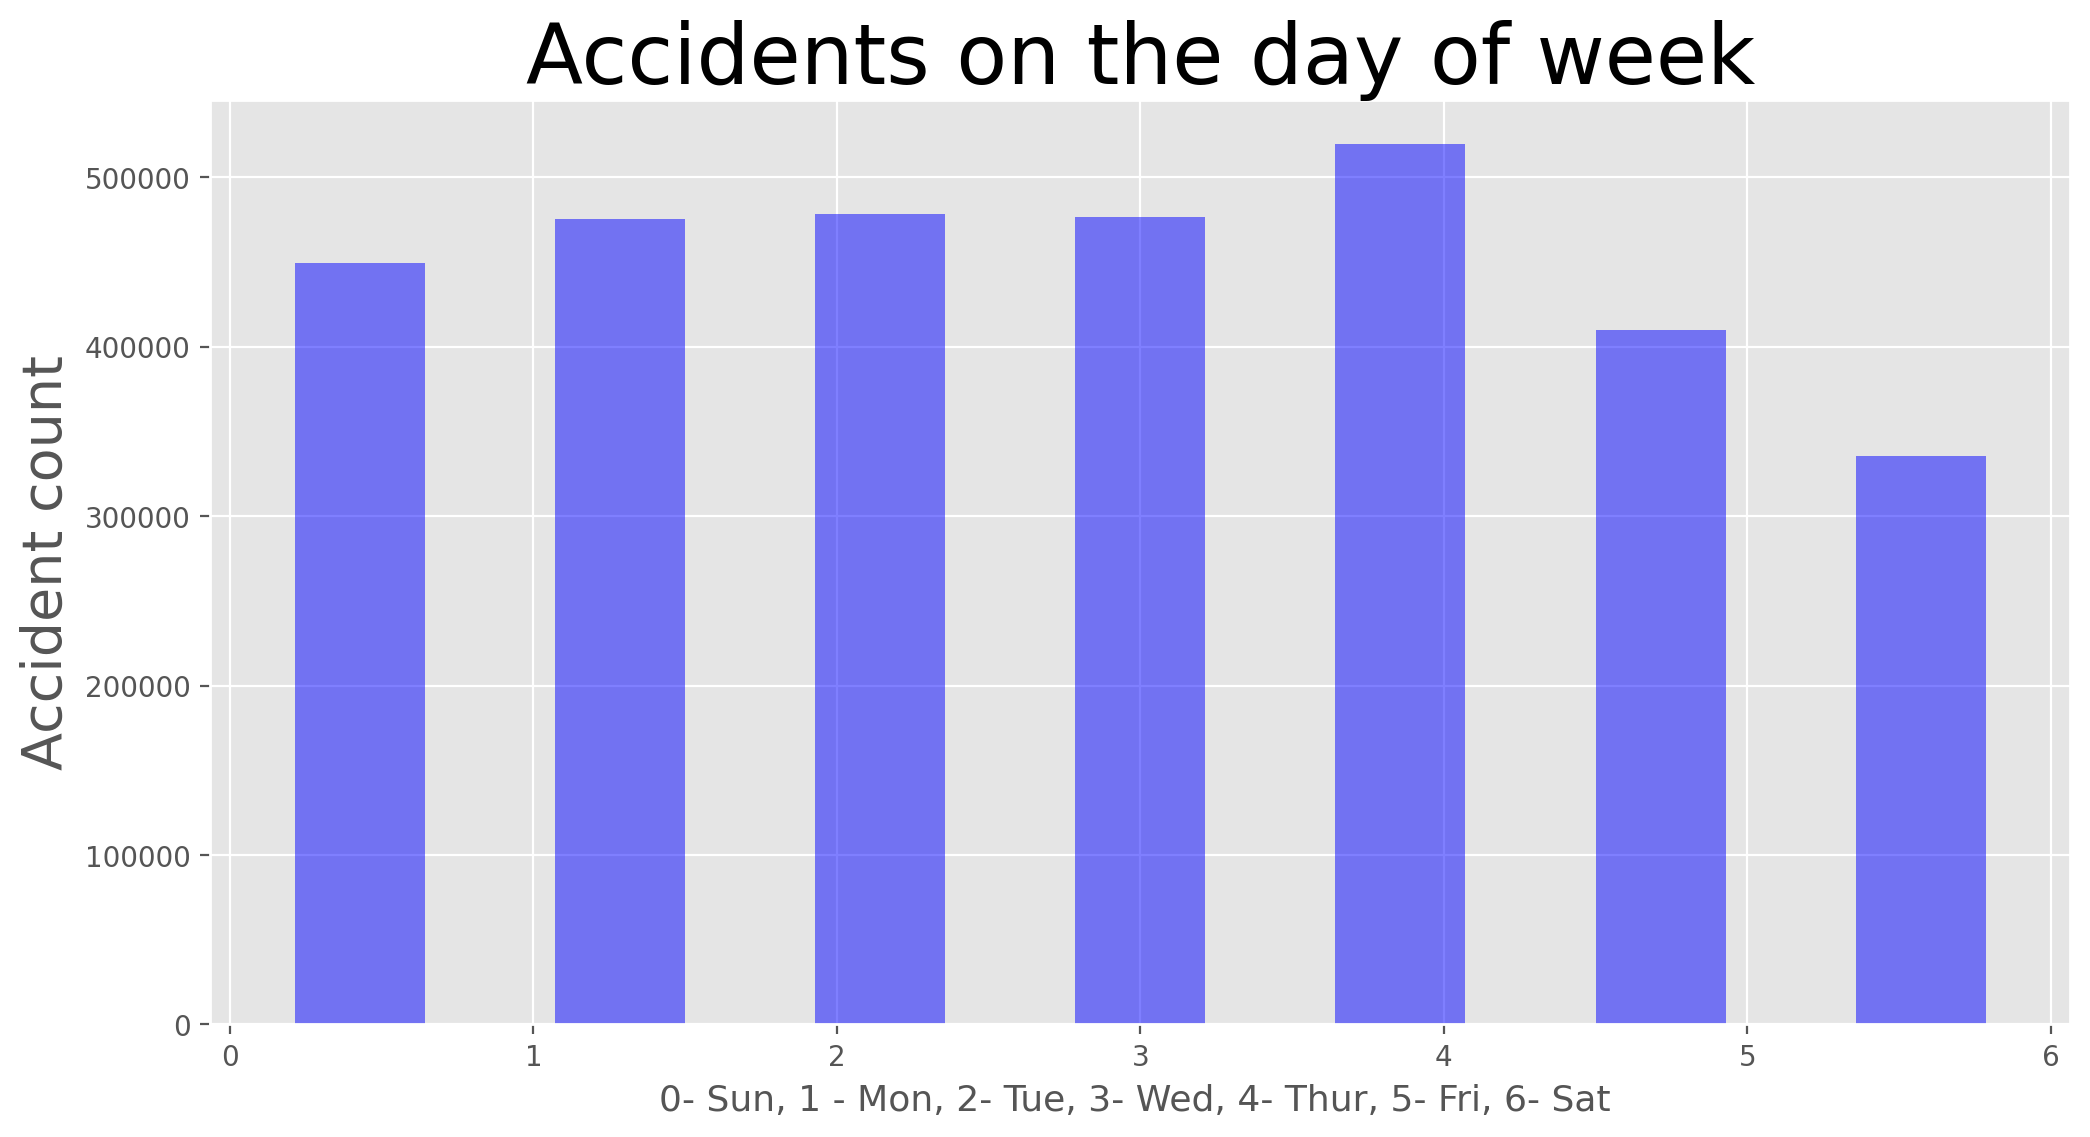

In [88]:
plt.figure(figsize = (12,6))
accidents['Date_Time'].dt.dayofweek.hist(bins= 7, rwidth = 0.5, alpha =0.5, color = 'blue')
plt.title('Accidents on the day of week', fontsize = 30)
plt.ylabel('Accident count', fontsize = 20)
plt.xlabel('0- Sun, 1 - Mon, 2- Tue, 3- Wed, 4- Thur, 5- Fri, 6- Sat ', fontsize = 13)
plt.show()

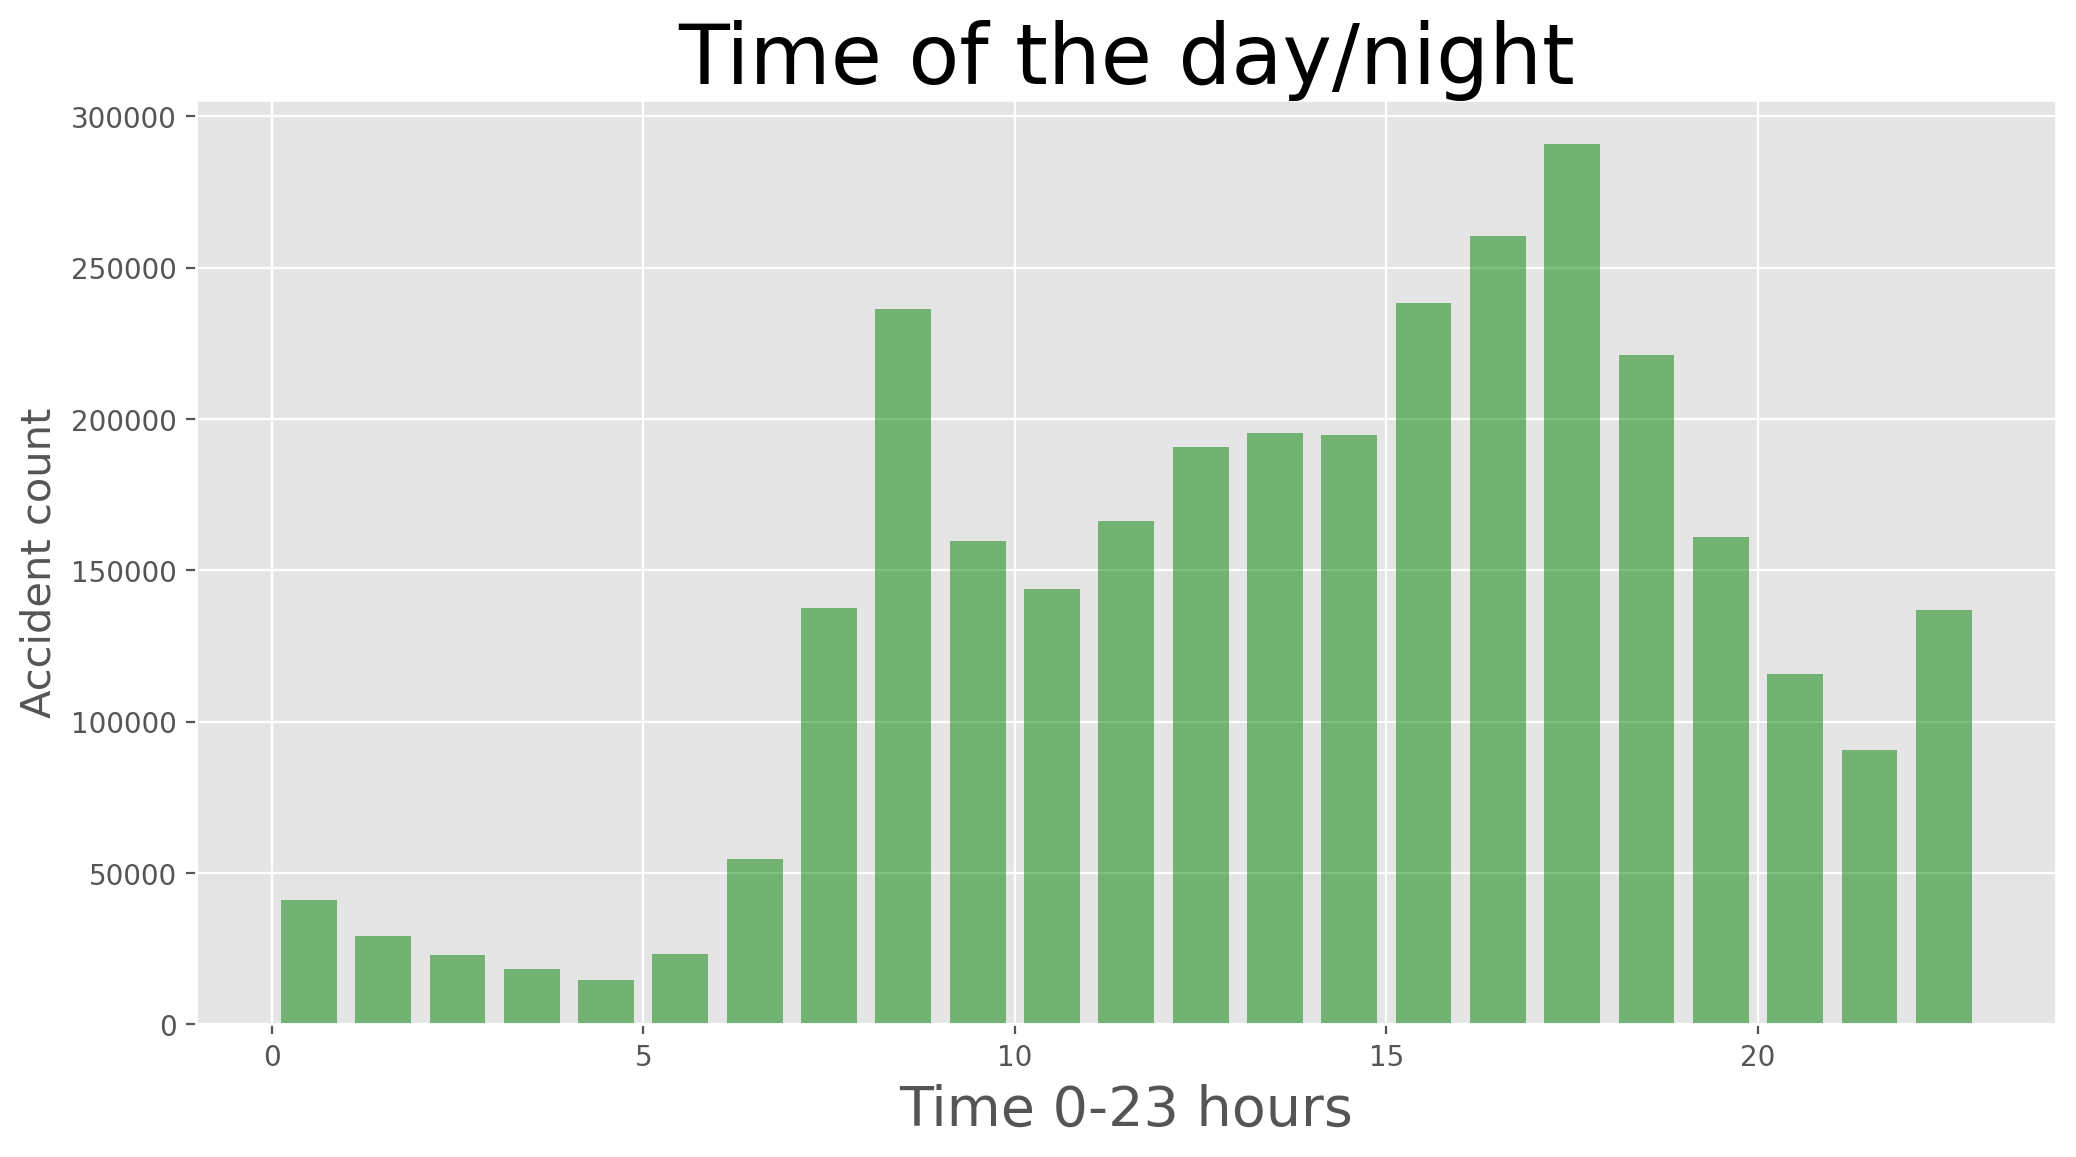

In [89]:
plt.figure(figsize=(12,6))
accidents.Date_Time.dt.hour.hist(bins= 23, rwidth= 0.75,alpha =0.50, color= 'green')
plt.title('Time of the day/night',fontsize= 30)
plt.xlabel('Time 0-23 hours' , fontsize = 20)
plt.ylabel('Accident count' , fontsize = 15)
plt.show()

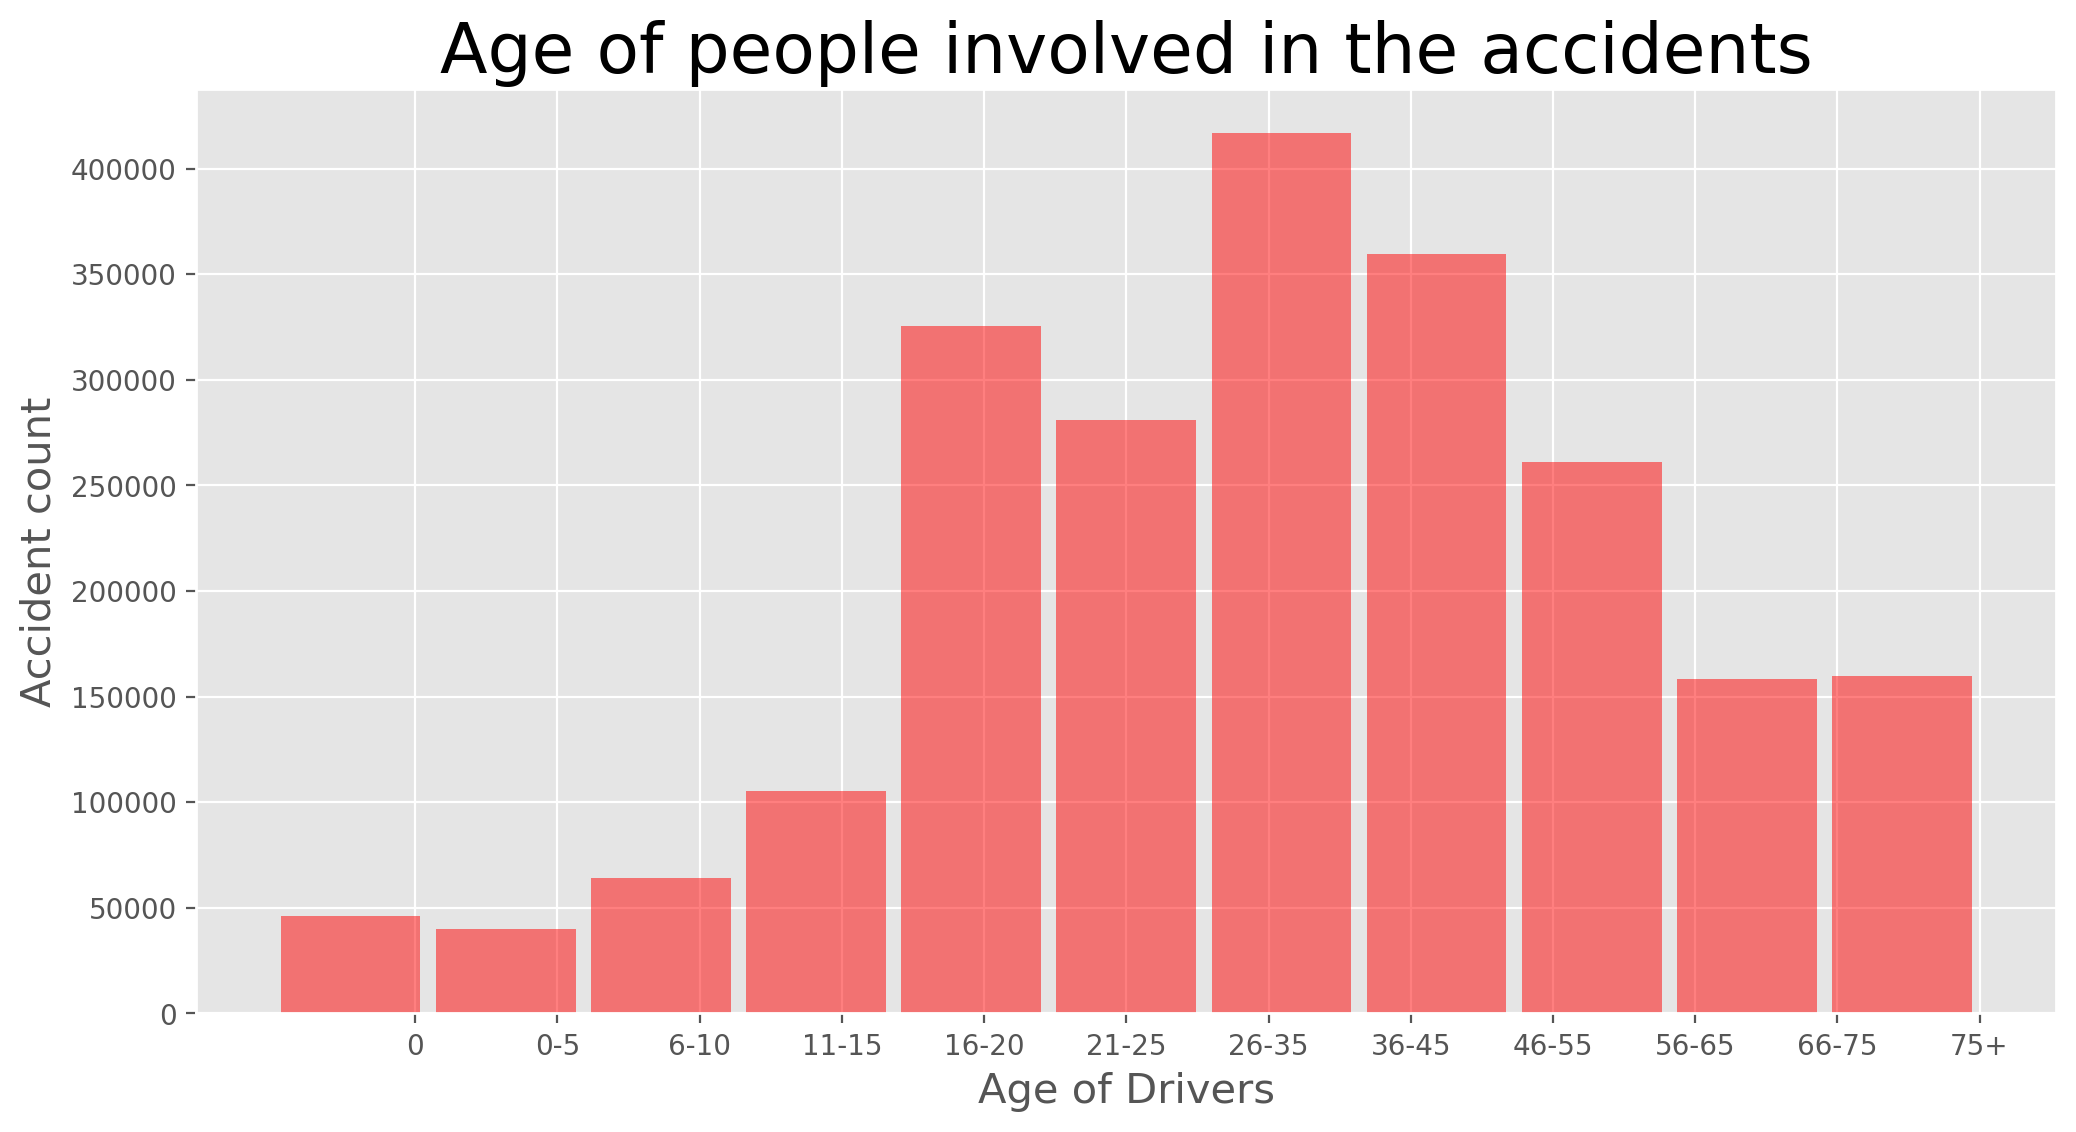

In [90]:
object = ['0', '0-5', '6-10', '11-15', '16-20', '21-25', '26-35', '36-45', '46-55', '56-65', '66-75', '75+'] 
plt.figure(figsize = (12,6))
casualties['Age_Band_of_Casualty'].hist(bins = 11, alpha = 0.5, rwidth = 0.9, color = 'red')
plt.title('Age of people involved in the accidents', fontsize = 25)
y_pos = np.arange(len(object))
plt.xticks(ticks=y_pos, labels= object) 
plt.ylabel('Accident count', fontsize = 15)
plt.xlabel('Age of Drivers', fontsize = 15)
plt.show()                                                    